

<span style="font-size:30px">Tarea 4: Generar el modelo </span>

Importar Datos Procesados

In [67]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv('datos_procesados.csv', index_col=0)

In [68]:
data.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,2 - Medium,3 - Low,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,0.583333


<span style="font-size:22px">Preparar datos para el modelamiento</span>


In [69]:
#revisar que no hay nas
data.isna().sum()


caller_id                  0
opened_by                  0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
u_priority_confirmation    0
duracion_horas             0
dtype: int64

In [70]:
#revisar que tipo de datos hay en cada columna 
data.dtypes

caller_id                   object
opened_by                   object
contact_type                object
location                    object
category                    object
subcategory                 object
u_symptom                   object
impact                      object
urgency                     object
priority                    object
assignment_group            object
assigned_to                 object
u_priority_confirmation       bool
duracion_horas             float64
dtype: object

Inicialmente todos son object. 
Como una red de modelamiento no puede recibir datos categóricos tenemos que lograr que todos sean numéricos. 
Para esto se puede modificas los que están codificados como números pero aparecen como str. 
Impact, Urgency, Priority

Tecnicamente solo me importa Priority porque segun el diccionario "priority: calculada por el sistema en base al 'impacto' y la 'urgencia'" 
Entonces la columna priority ya me tiene en cuenta el impacto y urgencia. Por eso borrare impacto y urgencia y me concentrare solo el prioridad


In [71]:
#sacar lsa columnas urgencia e impacto del data frame
data = data.drop('urgency', axis=1)
data = data.drop('impact', axis=1)
data.head()


,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,3 - Moderate,Group 70,Resolver 17,False,0.583333


Ver cuantas categorias tiene cada variable

In [72]:
print("caller id:", len(data['caller_id'].unique()))
print("opened_by:", len(data['opened_by'].unique()))
print("contact_type:", len(data['contact_type'].unique()))
print("location:", len(data['location'].unique()))
print("category:", len(data['category'].unique()))
print("subcategory:", len(data['subcategory'].unique()))
print("u_symptom:", len(data['u_symptom'].unique()))
print("priority:", len(data['priority'].unique()))
print("assignment_group:", len(data['assignment_group'].unique()))
print("assigned_to:", len(data['assigned_to'].unique()))
print("u_priority_confirmation:", len(data['u_priority_confirmation'].unique()))

caller id: 5004
opened_by: 200
contact_type: 4
location: 213
category: 54
subcategory: 237
u_symptom: 420
priority: 4
assignment_group: 69
assigned_to: 211
u_priority_confirmation: 2


<span style="font-size:22px">HACER CLUSTERING</span>

In [ ]:
#METODO 1 Clustering SIN FUNCION

'''

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- 1) Features por location (ajusta nombres de columnas si cambia)
features = (data.groupby("location")["duracion_horas"]
            .agg(mean="mean", median="median", std="std",
                 p25=lambda x: x.quantile(0.25),
                 p75=lambda x: x.quantile(0.75),
                 p90=lambda x: x.quantile(0.90))
            .fillna(0))

print(features)


# --- 2) Estandarizar rápido 
X = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0
X = X.values  # matriz para sklearn

# --- 3) Barrido de k: inercia (codo) + silhouette
Ks = range(2, 30)  # prueba k = 2..30
inertias, sils = [], []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X, labels))  # ∈ [-1, 1]; mayor es mejor

# --- 4) Graficar ambas curvas
fig, ax = plt.subplots()
ax.plot(Ks, inertias, marker="o")
ax.set_xlabel("Número de clusters (k)")
ax.set_ylabel("Inercia (codo)")
ax.set_title("Método del codo")
plt.show()

fig, ax = plt.subplots()
ax.plot(Ks, sils, marker="o")
ax.set_xlabel("Número de clusters (k)")
ax.set_ylabel("Silhouette promedio")
ax.set_title("Silhouette vs k")
plt.show()

# --- 5) k sugerido por silhouette
best_k = Ks[int(np.argmax(sils))]
print("Mejor k por silhouette:", best_k, " | silhouette:", max(sils))
'''

In [125]:
#Crear funcion para determinar numero de clusters K

def k_adecuado( nombre_col:str, dataset:pd.DataFrame ):
    features = (dataset.groupby(nombre_col)["duracion_horas"]
            .agg(mean="mean", median="median", std="std",
                 p25=lambda x: x.quantile(0.25),
                 p75=lambda x: x.quantile(0.75),
                 p90=lambda x: x.quantile(0.90))
            .fillna(0))

    print(features)


    # --- 2) Estandarizar rápido 
    X = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0
    X = X.values  # matriz para sklearn

    # --- 3) Barrido de k: inercia (codo) + silhouette
    Ks = range(2, 30)  # prueba k = 2..30
    inertias, sils = [], []

    for k in Ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X, labels))  # ∈ [-1, 1]; mayor es mejor

    # --- 4) Graficar ambas curvas
    fig, ax = plt.subplots()
    ax.plot(Ks, inertias, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Inercia (codo)")
    ax.set_title("Método del codo")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()


    #pedir input del star y end de la grafica 

    # --- Pedir input para el rango a graficar
    start = int(input("Ingrese el valor de k inicial para graficar: "))
    end = int(input("Ingrese el valor de k final para graficar: "))


    # Filtrar el rango
    Ks_range = [k for k in Ks if start <= k <= end]
    sils_range = [sils[i] for i, k in enumerate(Ks) if start <= k <= end]

    # --- Graficar Silhouette vs k en el rango seleccionado
    fig, ax = plt.subplots()
    ax.plot(Ks_range, sils_range, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    ax.set_xticks(Ks_range)
    plt.show()

    '''
    fig, ax = plt.subplots()
    ax.plot(Ks, sils, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()
    '''
    # --- 5) k sugerido por silhouette
    best_k = Ks[int(np.argmax(sils))]
    print("Mejor k por silhouette:", best_k, " | silhouette:", max(sils))

    k_escogido= int(input("Ingrese el valor de k escogido: "))
    return (k_escogido, features)

#Crear funcion para asignar el cluster adecuado a cada categoria

def clusters(k, features: pd.DataFrame):
    # Estandarizar igual que en k_adecuado
    features_scaled = (features - features.mean()) / features.std().replace(0, 1.0)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled.values)

    df_clusters = features.copy()
    df_clusters["cluster"] = labels

    return df_clusters, kmeans


Invocar el número de clusters por variable y guardar el df que devuelve en respectiva variable

In [122]:
data.columns

Index(['caller_id', 'opened_by', 'contact_type', 'location', 'category',
       'subcategory', 'u_symptom', 'priority', 'assignment_group',
       'assigned_to', 'u_priority_confirmation', 'duracion_horas'],
      dtype='object')

                   mean      median         std        p25         p75  \
caller_id                                                                
Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
Caller 1001  148.019444   36.975000  204.432493  13.708333  252.191667   
Caller 1002   18.125000    1.200000   34.631864   0.112500   19.212500   
Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
...                 ...         ...         ...        ...         ...   
Caller 995    89.183333   18.025000  140.482142  15.212500   93.216667   
Caller 996    29.162500   23.983333   34.406226   0.416667   52.729167   
Caller 997    57.366667   20.866667   69.516012   0.816667  122.200000   
Caller 998    96.061905   20.450000  145.781251   0.800000  143.891667   
Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

                    p90  
caller_id  

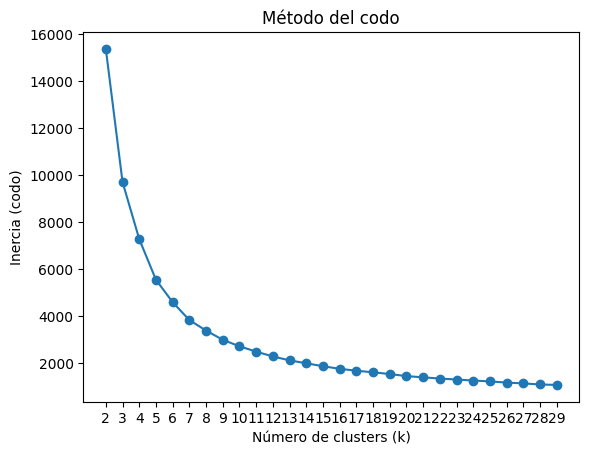

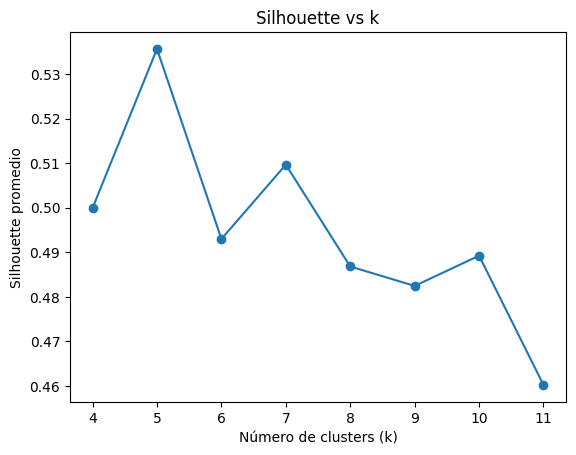

Mejor k por silhouette: 2  | silhouette: 0.5690669296914117
                      mean      median         std        p25         p75  \
opened_by                                                                   
Opened by  10   138.812745   22.600000  202.501448   3.950000  215.300000   
Opened by  101   64.475000   64.475000   51.559869  46.245833   82.704167   
Opened by  104  193.383333  193.383333  271.364012  97.441667  289.325000   
Opened by  106    1.016667    1.016667    0.000000   1.016667    1.016667   
Opened by  108   91.978230   24.983333  131.689934   0.841667  140.491667   
...                    ...         ...         ...        ...         ...   
Opened by  88    41.916667   41.916667    0.000000  41.916667   41.916667   
Opened by  9    220.209910  192.200000  161.281566  96.350000  314.433333   
Opened by  90    28.333333   28.333333    0.000000  28.333333   28.333333   
Opened by  91   106.362500   32.475000  171.654632   2.541667  136.295833   
Opened by  94   

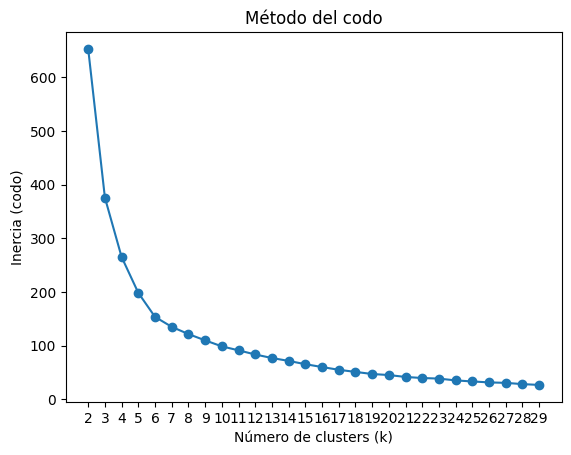

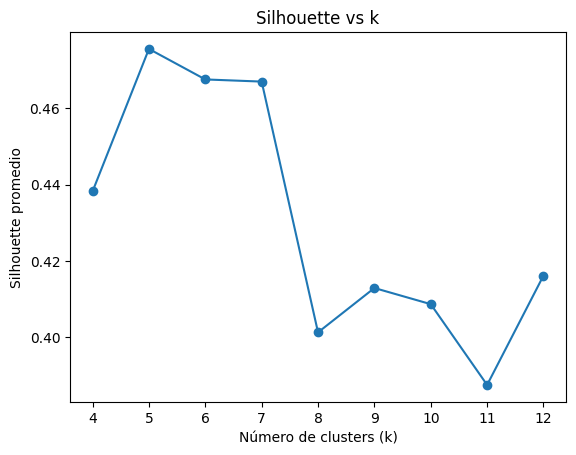

Mejor k por silhouette: 2  | silhouette: 0.533375889373115
                    mean      median         std         p25         p75  \
location                                                                   
Location 10    23.827778    1.600000   39.791157    0.858333   35.683333   
Location 100   31.541667   31.541667   18.184429   25.112500   37.970833   
Location 101    8.550000    8.550000    0.000000    8.550000    8.550000   
Location 102    1.000000    1.000000    0.000000    1.000000    1.000000   
Location 105  159.050000  159.050000    0.000000  159.050000  159.050000   
...                  ...         ...         ...         ...         ...   
Location 95     0.066667    0.066667    0.000000    0.066667    0.066667   
Location 96    91.911538   23.516667  138.803557    0.891667  141.916667   
Location 97    82.527558    2.966667  146.981107    0.300000  100.950000   
Location 98    31.033333   31.033333    0.000000   31.033333   31.033333   
Location 99   135.722917   61

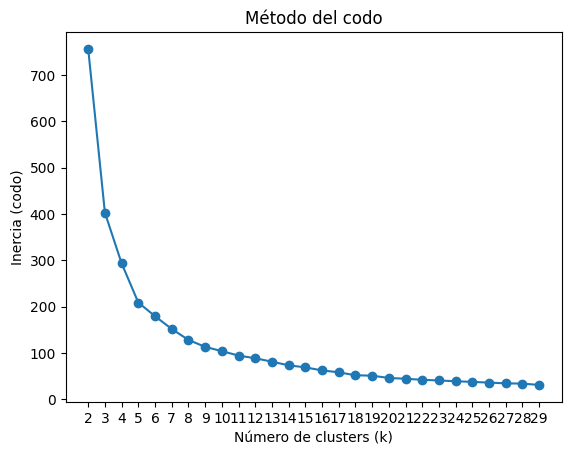

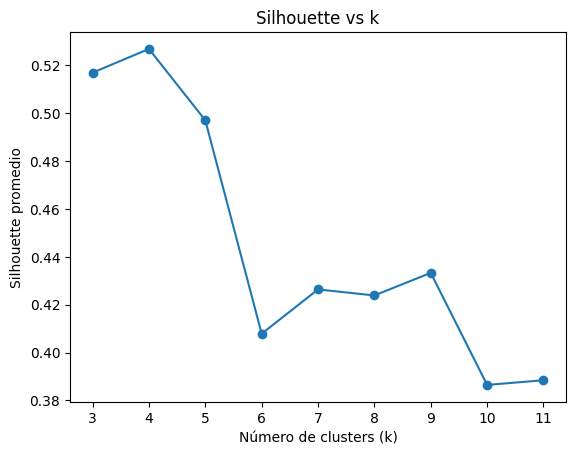

Mejor k por silhouette: 4  | silhouette: 0.5268862017852011
                   mean      median         std         p25         p75  \
category                                                                  
Category 10   93.433333  114.966667   41.493386   80.283333  117.350000   
Category 12   53.433333   53.433333    0.000000   53.433333   53.433333   
Category 13   92.930725   50.283333  113.797297    5.966667  131.275000   
Category 14   87.766667   87.766667    0.000000   87.766667   87.766667   
Category 15    0.366667    0.366667    0.000000    0.366667    0.366667   
Category 16    2.966667    2.966667    2.121320    2.216667    3.716667   
Category 17   60.287556   18.833333  103.007971    0.791667   70.875000   
Category 19  107.974505   28.716667  160.722217    3.904167  124.429167   
Category 2     1.125000    0.700000    1.093457    0.420833    1.404167   
Category 20   52.526875    1.650000   96.125707    0.233333   61.258333   
Category 21   62.079167   58.083333   48

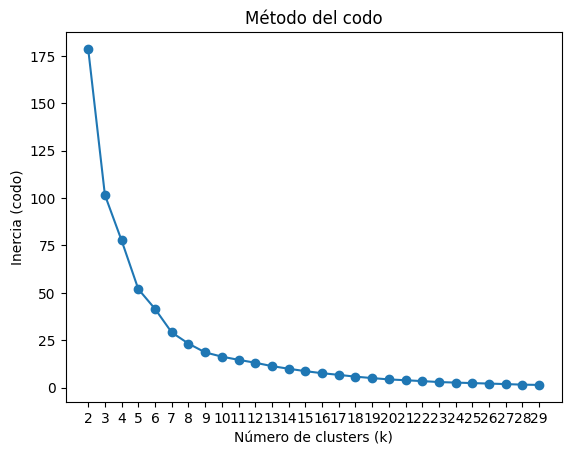

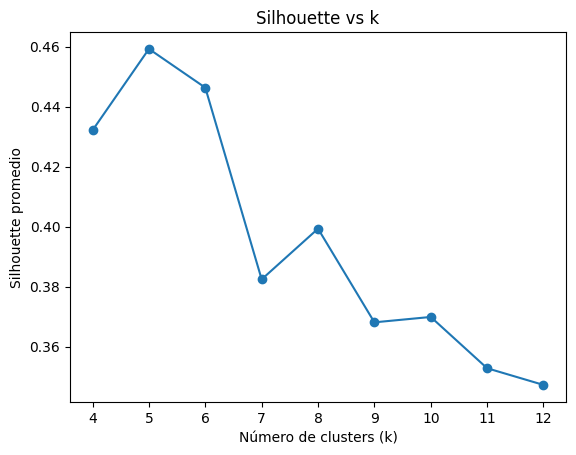

Mejor k por silhouette: 2  | silhouette: 0.7300191069521823
                       mean      median         std         p25         p75  \
subcategory                                                                   
Subcategory 10    13.690476    0.166667   27.524361    0.066667   11.000000   
Subcategory 100  184.250000  184.250000   84.923524  154.225000  214.275000   
Subcategory 101  150.816667   85.525000  174.527843   12.750000  256.758333   
Subcategory 102  106.588889  124.500000   98.742626   62.308333  159.825000   
Subcategory 103   49.766416    2.291667   93.043957    0.283333   51.595833   
...                     ...         ...         ...         ...         ...   
Subcategory 94   174.587455  100.650000  191.976502   19.000000  269.950000   
Subcategory 95     0.650000    0.650000    0.000000    0.650000    0.650000   
Subcategory 96   635.627778  677.900000   75.043636  613.441667  678.950000   
Subcategory 97    53.466667   53.466667    0.000000   53.466667   53.46

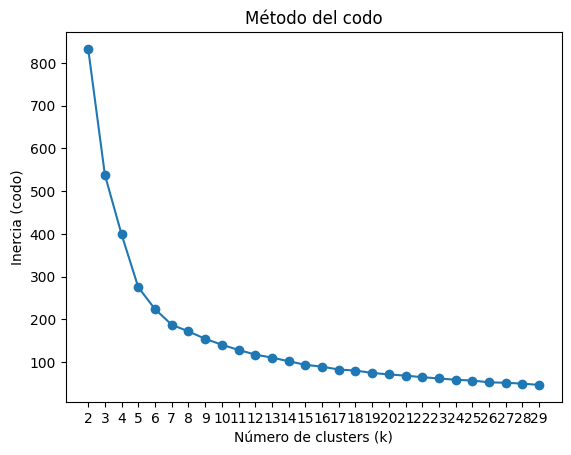

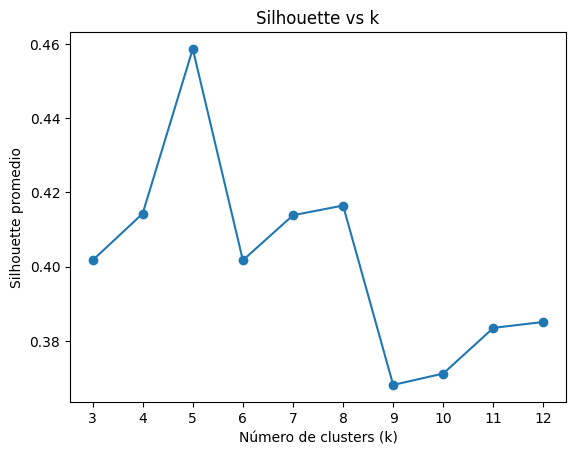

Mejor k por silhouette: 2  | silhouette: 0.4955118013222681
                    mean      median         std        p25         p75  \
u_symptom                                                                 
No reportado   94.120461   21.500000  145.960240   0.500000  140.887500   
Symptom 10    104.074350   63.333333  119.678980   9.883333  150.500000   
Symptom 101   165.483333  168.500000  108.008238  89.950000  196.900000   
Symptom 102   117.182153   48.833333  143.725128   7.116667  170.350000   
Symptom 105    22.680539    0.133333   77.748058   0.066667    0.391667   
...                  ...         ...         ...        ...         ...   
Symptom 93     48.704762   16.050000   68.745648   4.550000   61.641667   
Symptom 94     17.500000    3.166667   22.450677   3.016667   24.116667   
Symptom 96      0.966667    0.966667    0.000000   0.966667    0.966667   
Symptom 97    153.766667   21.733333  245.179488  12.316667  229.200000   
Symptom 99     41.233333    5.916667   6

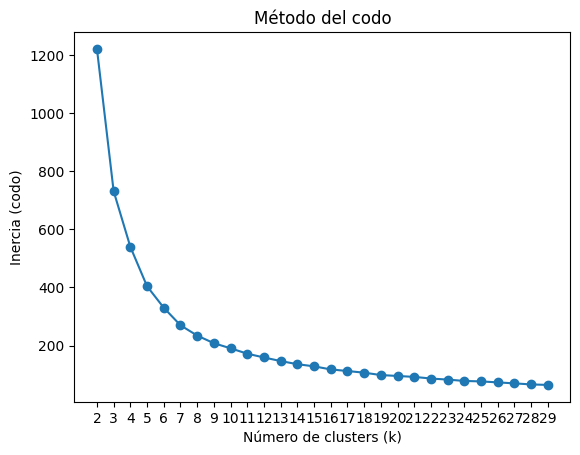

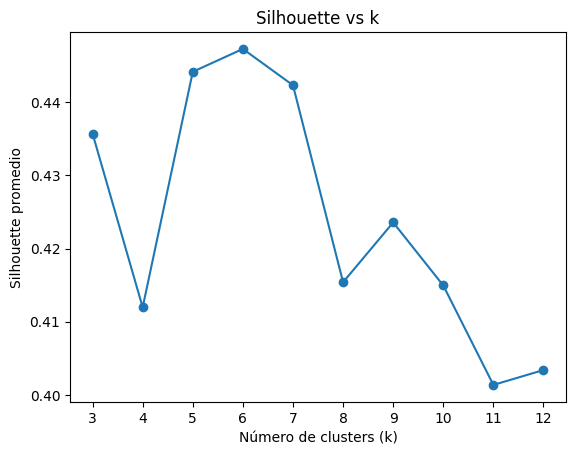

Mejor k por silhouette: 2  | silhouette: 0.581071913434715
                        mean      median         std         p25         p75  \
assignment_group                                                               
Group 10          230.913475  171.350000  224.032528   23.491667  385.950000   
Group 12          249.477516  275.000000  178.738809  101.720833  360.320833   
Group 13          181.404348   99.916667  205.091497   21.866667  304.458333   
Group 14          263.933333  161.941667  271.225775   84.516667  416.866667   
Group 15          198.675000  120.808333  195.186979   52.654167  337.983333   
...                      ...         ...         ...         ...         ...   
Group 80          202.016667  196.616667  202.270735   99.558333  301.775000   
Group 81          148.769444  158.958333  101.810835   76.025000  200.179167   
Group 82           67.680556   24.108333  105.235743   17.991667   76.666667   
Group 9           348.812593  338.800000  222.876072  172.283

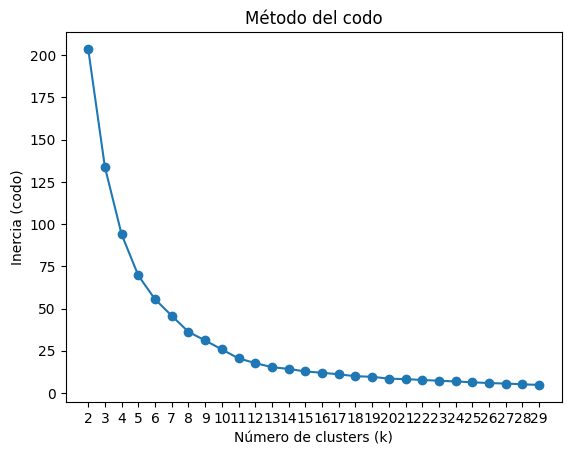

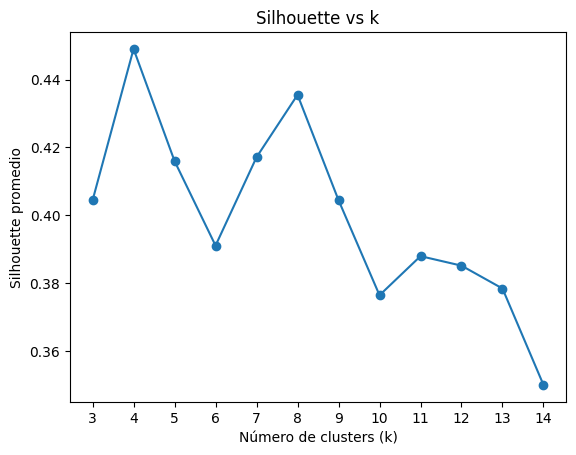

Mejor k por silhouette: 2  | silhouette: 0.47536137220515734
                    mean      median         std         p25         p75  \
assigned_to                                                                
No asignado    95.645428   21.675000  146.593375    0.400000  145.579167   
Resolver 10    66.535333   17.266667  104.266567    2.350000  122.466667   
Resolver 100  175.599479  117.400000  171.236041   49.962500  239.600000   
Resolver 101  193.004520  121.250000  201.808568   25.075000  333.795833   
Resolver 103  303.261111  279.500000  127.920565  251.366667  384.683333   
...                  ...         ...         ...         ...         ...   
Resolver 93   231.834167  169.900000  220.473052   46.770833  363.558333   
Resolver 94     5.981932    0.083333   24.685010    0.033333    0.570833   
Resolver 96   125.637500   72.375000  140.071538   40.437500  157.575000   
Resolver 97   114.772222   67.758333  156.721040    2.966667  141.383333   
Resolver 99    38.537719   

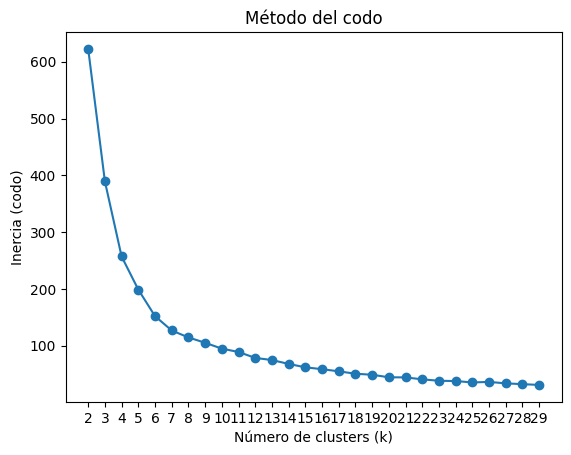

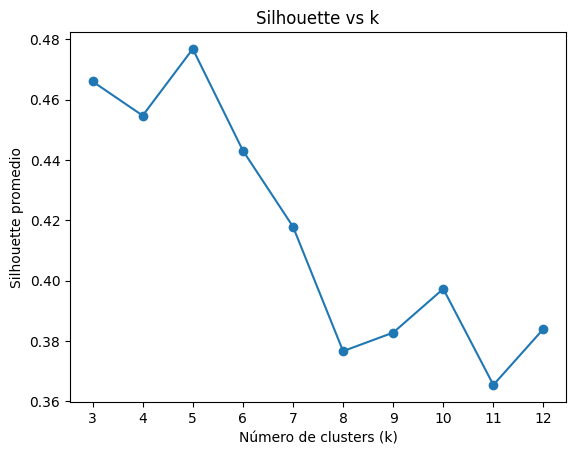

Mejor k por silhouette: 2  | silhouette: 0.516644108998282


In [127]:
cols=['caller_id', 'opened_by', 'location', 'category', 'subcategory', 'u_symptom', 'assignment_group', 'assigned_to']
features_dict={}
for col in cols:
    features_dict[f"features_{col}"] = k_adecuado(col, data)

Con los K ya definidos, clusterizar los datos y guardar esos dataframes de respuestas en un diccionario 

In [137]:
cluster_dict={}
for col in cols:
    k, feature = features_dict[f"features_{col}"]
    cluster_dict[col]= clusters(k,feature)

In [138]:
cluster_dict


{'caller_id': (                   mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  148.019444   36.975000  204.432493  13.708333  252.191667   
  Caller 1002   18.125000    1.200000   34.631864   0.112500   19.212500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    89.183333   18.025000  140.482142  15.212500   93.216667   
  Caller 996    29.162500   23.983333   34.406226   0.416667   52.729167   
  Caller 997    57.366667   20.866667   69.516012   0.816667  122.200000   
  Caller 998    96.061905   20.450000  145.781251   0.800000  143.891667   
  Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

Volver dummies aquellas que tienes menos de 10 categorias en un dataframe diferentes

In [73]:
df = pd.get_dummies(data, columns=['contact_type'], prefix='', prefix_sep='', dtype=int)

df.head()

,caller_id,opened_by,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas,Direct opening,Email,Phone,Self service
number,,,,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Location 108,Category 32,Subcategory 9,Symptom 470,3 - Moderate,Group 70,No asignado,False,0.616667,0,0,1,0
INC0000088,Caller 388,Opened by 180,Location 93,Category 42,Subcategory 224,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.283333,0,0,1,0
INC0000101,Caller 1892,Opened by 180,Location 143,Category 55,Subcategory 170,Symptom 273,4 - Low,Group 65,Resolver 180,False,1.916667,0,0,1,0
INC0000192,Caller 1590,Opened by 131,Location 143,Category 45,Subcategory 200,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.066667,0,0,1,0
INC0000167,Caller 649,Opened by 24,Location 108,Category 20,Subcategory 125,No reportado,3 - Moderate,Group 70,Resolver 17,False,0.583333,0,0,1,0


In [74]:
#sacar las categorias de priority
data['priority'].unique()

array(['3 - Moderate', '4 - Low', '2 - High', '1 - Critical'],
      dtype=object)

Poner las etiquetas de prioridad como numeros 

In [75]:
data['priority'].map({'3 - Moderate':3, '4 - Low': 4,'2 - High': 2,'1 - Critical':1 })

number
INC0000077    3
INC0000088    3
INC0000101    4
INC0000192    3
INC0000167    3
             ..
INC0118026    3
INC0119390    3
INC0120835    3
INC0121064    3
INC0120304    3
Name: priority, Length: 21497, dtype: int64

In [76]:
data['priority'] = data['priority'].map({'3 - Moderate':3, '4 - Low': 4,'2 - High': 2,'1 - Critical':1 })

In [77]:
data.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,3,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,3,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,4,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,3,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,3,Group 70,Resolver 17,False,0.583333
